In [1]:
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np
import itertools


In [2]:
lc = lk.search_lightcurve('KIC 11615890', mission='Kepler').download_all().stitch().remove_nans()

In [3]:
pg = lc.to_periodogram(normalization='amplitude',)# minimum_frequency=10, maximum_frequency=20)

<AxesSubplot:xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power'>

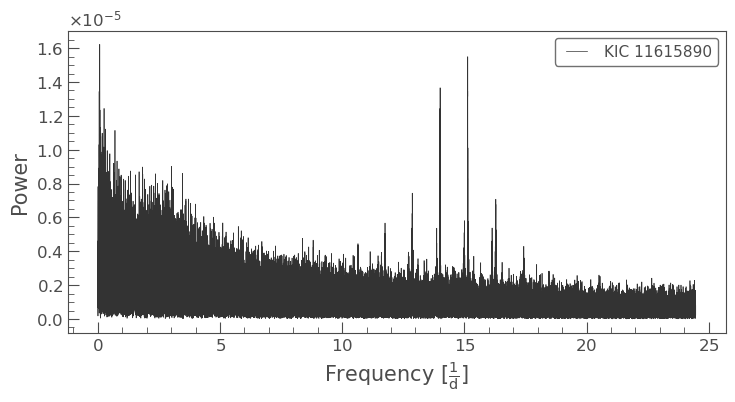

In [4]:
pg.plot()

In [5]:
f, a = pg.frequency.value, pg.power.value

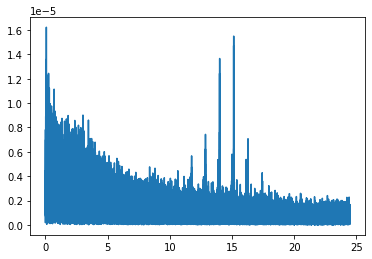

In [6]:
plt.plot(f,a)

In [64]:
dnu = 4

In [65]:
# %%timeit

ind = np.argwhere(np.diff(f % dnu / dnu) < 0).flatten()
a_split = np.array_split(a, ind)
# f_split = np.array_split(f, ind)
# test = np.array(list(itertools.zip_longest(*split, fillvalue=0))).T
max_length = max(len(row) for row in a_split)
result = np.array([np.pad(row, (0, max_length-len(row))) for row in a_split])
# f_result = np.array([np.pad(row, (0, max_length-len(row))) for row in f_split])

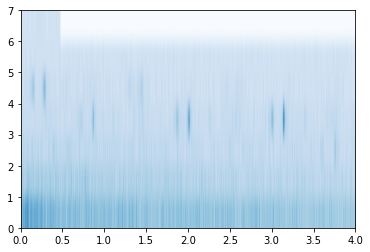

In [66]:
plt.imshow(np.sqrt(result), aspect='auto', origin='lower', cmap='Blues', interpolation=None, extent=[0, dnu,0, result.shape[0]])

In [69]:
result.shape#[0]

(7, 29410)

In [51]:
from echelle import plot_echelle, echelle

In [54]:
%timeit echelle(f, a, dnu)

15.2 ms ± 71.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<AxesSubplot:xlabel='Frequency mod 4', ylabel='Frequency'>

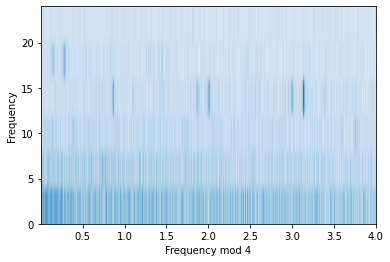

In [67]:
plot_echelle(f, np.sqrt(a), dnu, interpolation=None)

In [32]:
result.shape

(245, 736)

In [48]:
result.reshape(-1).shape

(180320,)

In [49]:
a.shape

(179907,)

In [13]:
%%timeit
echelle(f, a, dnu)

14.8 ms ± 190 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
from echelle import interact_echelle


%1.19f


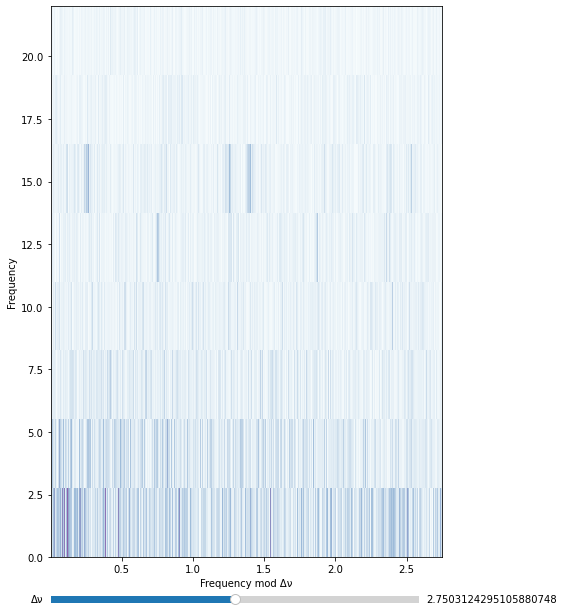

In [25]:
interact_echelle(f, a, dnu_min=0.5, dnu_max=5, backend='matplotlib')